# Dataset Exploration and Visualizations

1. mHealth Dataset

- Exploring the distribution of the labels of mHealth dataset
- Visualizing the distribution of the labels of mHealth dataset

2. WISDM Dataset

- Exploring the distribution of the labels of WISDM dataset
- Visualizing the distribution of the labels of WISDM dataset

3. Senior Citizens Dataset

- Exploring the distribution of the labels of Senior Citizens dataset
- Visualizing the distribution of the labels of Senior Citizens dataset


In [29]:
# Importing the libraries
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## 1. mHealth Dataset


In [30]:
# Read the data
mhealth_df = pd.read_csv(
    r"D:\Work\HAR-Comparison-Privacy\processed_data\activity_recognition_mHealth\all_users.csv"
)
mhealth_df.head()

,User_ID,Acc.X.Chest_mean,Acc.X.Chest_std,Acc.X.Chest_min_,Acc.X.Chest_max_,Acc.X.Chest_range_,Acc.X.Chest_iqr,Acc.X.Chest_kurtosis,Acc.X.Chest_skewness,Acc.X.Chest_rms,...,Acc.Magnitude.Right_Arm_mean,Acc.Magnitude.Right_Arm_std,Acc.Magnitude.Right_Arm_min_,Acc.Magnitude.Right_Arm_max_,Acc.Magnitude.Right_Arm_range_,Acc.Magnitude.Right_Arm_iqr,Acc.Magnitude.Right_Arm_kurtosis,Acc.Magnitude.Right_Arm_skewness,Acc.Magnitude.Right_Arm_rms,Label
0,1,-9.701686,0.039244,-9.818275,-9.665915,0.152360,0.024232,2.794278,-1.894163,9.701765,...,9.744176,0.070746,9.637528,9.853015,0.215487,0.125305,-1.389547,0.090677,9.744433,0.0
1,1,-9.751088,0.039413,-9.838465,-9.682853,0.155612,0.026241,0.023541,-0.440791,9.751168,...,9.735049,0.082550,9.620722,9.865866,0.245144,0.139291,-1.298045,0.086254,9.735399,0.0
2,1,-9.810111,0.048817,-9.889394,-9.726672,0.162722,0.080774,-1.114043,-0.308741,9.810233,...,9.760975,0.074977,9.651873,9.855297,0.203423,0.144347,-1.525989,-0.141860,9.761263,0.0
3,1,-9.679619,0.028643,-9.729421,-9.628265,0.101156,0.042649,-0.806028,0.403073,9.679662,...,9.730309,0.078964,9.623975,9.846896,0.222921,0.145685,-1.464607,0.117036,9.730629,0.0
4,1,-9.751594,0.101549,-9.875578,-9.590644,0.284934,0.184595,-1.360590,0.363057,9.752123,...,9.832905,0.055621,9.752335,9.911733,0.159398,0.100004,-1.405651,0.016692,9.833062,0.0


In [31]:
# Getting the labels
labels = mhealth_df["Label"].unique()
print(labels)

[ 0.  1.  2.  3.  4.  6.  7.  8.  9. 10. 11. 12.  5.]


In [32]:
# Mapping the labels
mapping_labels = {
    0: "No activity",
    1: "Standing",
    2: "Sitting",
    3: "Lying",
    4: "Walking",
    5: "Stairs",
    6: "Bending",
    7: "Arms Raised",
    8: "Knees Bending",
    9: "Cycling",
    10: "Jogging",
    11: "Running",
    12: "Jumping",
}
mhealth_df["Label"] = mhealth_df["Label"].map(mapping_labels)

In [33]:
# Checking the labels
labels = mhealth_df["Label"].unique()
print(labels)

['No activity' 'Standing' 'Sitting' 'Lying' 'Walking' 'Bending'
 'Arms Raised' 'Knees Bending' 'Cycling' 'Jogging' 'Running' 'Jumping'
 'Stairs']


In [34]:
# Getting the specific labels only
specific_labels = [
    "Standing",
    "Sitting",
    "Lying",
    "Walking",
    "Jogging",
    "Running",
    "Stairs",
]
mhealth_df = mhealth_df[mhealth_df["Label"].isin(specific_labels)]

In [35]:
# Getting the specific labels count only
specific_labels_counts = {}
for label in specific_labels:
    specific_labels_counts[label] = len(mhealth_df[mhealth_df["Label"] == label])
    print(
        f"Total amount of data for {label}: {len(mhealth_df[mhealth_df['Label'] == label])}"
    )

Total amount of data for Standing: 2050
Total amount of data for Sitting: 2049
Total amount of data for Lying: 2047
Total amount of data for Walking: 2049
Total amount of data for Jogging: 2048
Total amount of data for Running: 2048
Total amount of data for Stairs: 2047


Text(0.5, 1.0, 'Distribution of classes - mHealth')

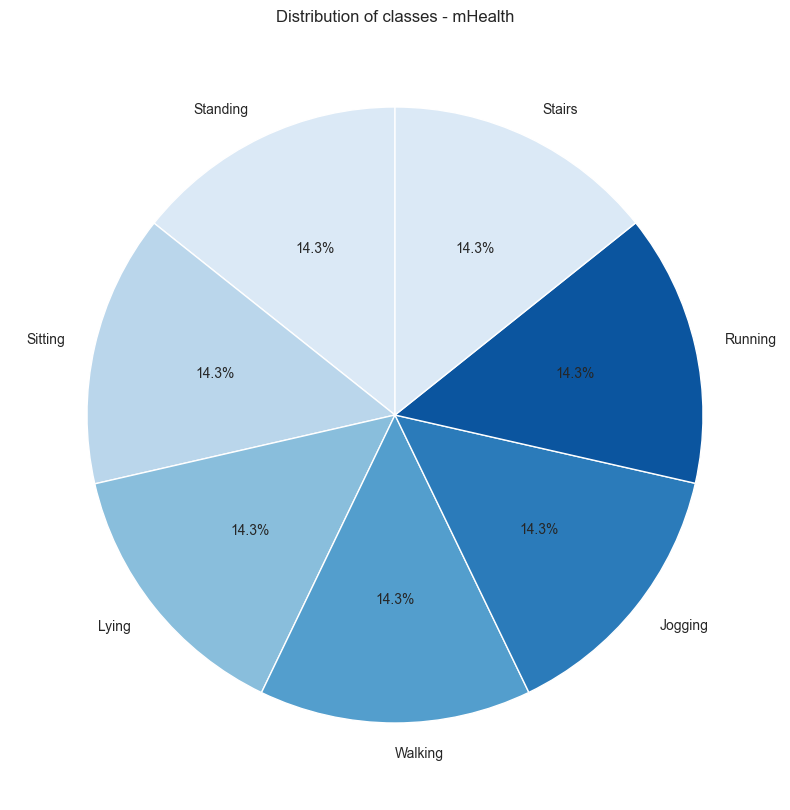

In [36]:
# Plotting the specific labels count as a pie chart with percentage seaborn
plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
sns.set_palette("Blues")
plt.pie(
    specific_labels_counts.values(),
    labels=specific_labels_counts.keys(),
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Distribution of classes - mHealth")

Text(0.5, 1.0, 'Distribution of classes - mHealth')

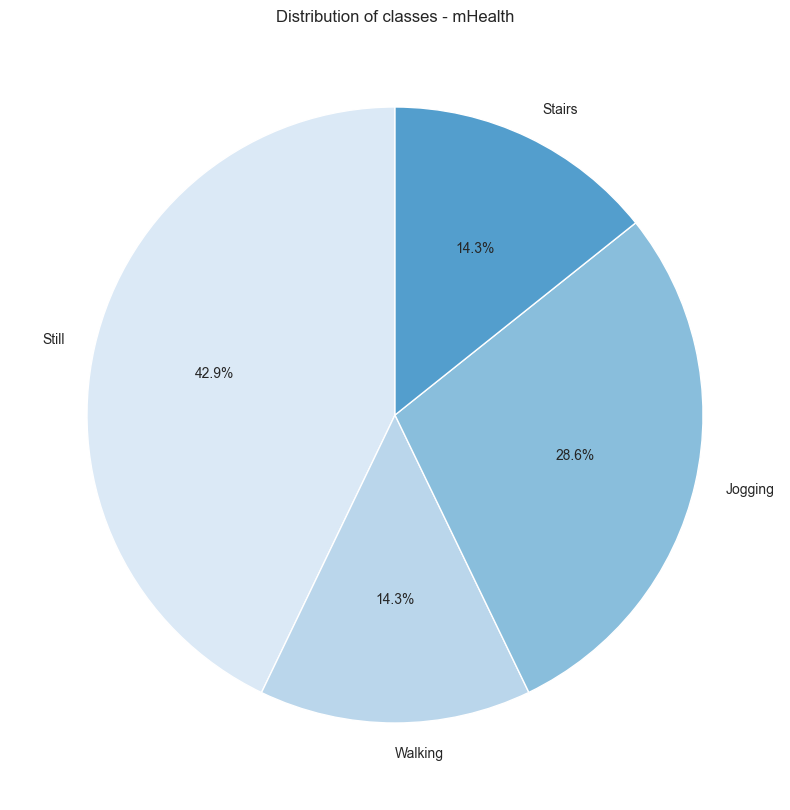

In [37]:
# Plotting the specific labels but sitting, lying and standing combine them and jogging and running combine them
plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
sns.set_palette("Blues")
plt.pie(
    [
        specific_labels_counts["Sitting"]
        + specific_labels_counts["Lying"]
        + specific_labels_counts["Standing"],
        specific_labels_counts["Walking"],
        specific_labels_counts["Jogging"] + specific_labels_counts["Running"],
        specific_labels_counts["Stairs"],
    ],
    labels=["Still", "Walking", "Jogging", "Stairs"],
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Distribution of classes - mHealth")

Text(0.5, 1.0, 'Distribution of classes - mHealth')

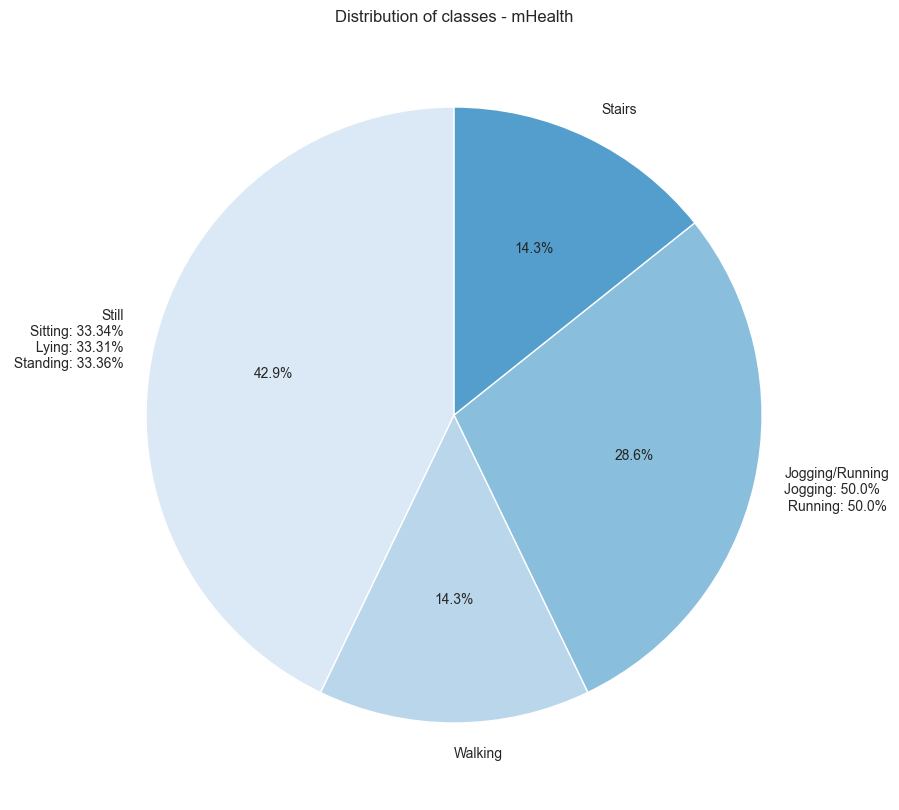

In [38]:
# Plotting the specific labels but sitting, lying and standing combine them and jogging and running combine them
plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
sns.set_palette("Blues")
still_total = (
    specific_labels_counts["Sitting"]
    + specific_labels_counts["Lying"]
    + specific_labels_counts["Standing"]
)
sitting_percentage = round(specific_labels_counts["Sitting"] / still_total * 100, 2)
lying_percentage = round(specific_labels_counts["Lying"] / still_total * 100, 2)
standing_percentage = round(specific_labels_counts["Standing"] / still_total * 100, 2)
jogging_total = specific_labels_counts["Jogging"] + specific_labels_counts["Running"]
jogging_percentage = round(specific_labels_counts["Jogging"] / jogging_total * 100, 2)
running_percentage = round(specific_labels_counts["Running"] / jogging_total * 100, 2)
still_label = f"Still\nSitting: {sitting_percentage}%\n Lying: {lying_percentage}%\n Standing: {standing_percentage}%"
jogging_label = (
    f"Jogging/Running\nJogging: {jogging_percentage}%\n Running: {running_percentage}%"
)
plt.pie(
    [
        specific_labels_counts["Sitting"]
        + specific_labels_counts["Lying"]
        + specific_labels_counts["Standing"],
        specific_labels_counts["Walking"],
        specific_labels_counts["Jogging"] + specific_labels_counts["Running"],
        specific_labels_counts["Stairs"],
    ],
    labels=[still_label, "Walking", jogging_label, "Stairs"],
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Distribution of classes - mHealth")

## 2. WISDM Dataset


In [39]:
# Read the data
wisdm_df = pd.read_csv(
    r"D:\Work\HAR-Comparison-Privacy\processed_data\activity_recognition_wisdm\all_users.csv"
)
wisdm_df.head()

,User_ID,Acc.X.Phone_mean,Acc.X.Phone_std,Acc.X.Phone_min_,Acc.X.Phone_max_,Acc.X.Phone_range_,Acc.X.Phone_iqr,Acc.X.Phone_kurtosis,Acc.X.Phone_skewness,Acc.X.Phone_rms,...,Acc.Magnitude.Phone_mean,Acc.Magnitude.Phone_std,Acc.Magnitude.Phone_min_,Acc.Magnitude.Phone_max_,Acc.Magnitude.Phone_range_,Acc.Magnitude.Phone_iqr,Acc.Magnitude.Phone_kurtosis,Acc.Magnitude.Phone_skewness,Acc.Magnitude.Phone_rms,Label
0,1,2.312424,4.364166,-3.656171,10.258013,13.914184,3.963301,-0.546337,0.582609,4.938953,...,8.838989,3.264623,5.584560,14.736326,9.151766,4.464893,-0.884474,0.692170,9.422605,1.0
1,1,3.272272,5.519073,-2.741494,13.414924,16.156418,6.805059,-0.649045,0.629252,6.416224,...,12.800909,2.445575,10.343103,17.783347,7.440244,1.917429,0.141888,1.124436,13.032426,1.0
2,1,5.271831,2.053836,3.190634,9.309275,6.118642,2.146760,-0.244014,0.994309,5.657777,...,10.645064,2.402347,8.200300,14.740501,6.540201,3.618307,-1.125325,0.598537,10.912775,1.0
3,1,4.033476,3.524306,-0.501917,10.122001,10.623918,4.333129,-0.940585,0.513220,5.356273,...,13.231517,4.071245,5.602378,17.033500,11.431122,4.388207,-0.697291,-0.944088,13.843702,1.0
4,1,3.314182,5.663636,-4.380355,11.253502,15.633857,8.561458,-1.366781,0.258396,6.562056,...,10.594915,4.625746,3.138539,16.494484,13.355945,6.777214,-1.179018,-0.259490,11.560698,1.0


In [40]:
# Getting the labels
labels = wisdm_df["Label"].unique()
print(labels)

[1. 2. 3. 4. 5. 6.]


In [41]:
# Mapping the labels
mapping_labels = {
    1: "Walking",
    2: "Jogging",
    3: "Upstairs",
    4: "Downstairs",
    5: "Sitting",
    6: "Standing",
}
wisdm_df["Label"] = wisdm_df["Label"].map(mapping_labels)

In [42]:
# Getting the labels
labels = wisdm_df["Label"].unique()
print(labels)

['Walking' 'Jogging' 'Upstairs' 'Downstairs' 'Sitting' 'Standing']


In [43]:
# Getting the labels count
labels_counts = {}
for label in labels:
    labels_counts[label] = len(wisdm_df[wisdm_df["Label"] == label])
    print(
        f"Total amount of data for {label}: {len(wisdm_df[wisdm_df['Label'] == label])}"
    )

Total amount of data for Walking: 69660
Total amount of data for Jogging: 54087
Total amount of data for Upstairs: 20435
Total amount of data for Downstairs: 16692
Total amount of data for Sitting: 9990
Total amount of data for Standing: 8058


Text(0.5, 1.0, 'Distribution of classes - WISDM')

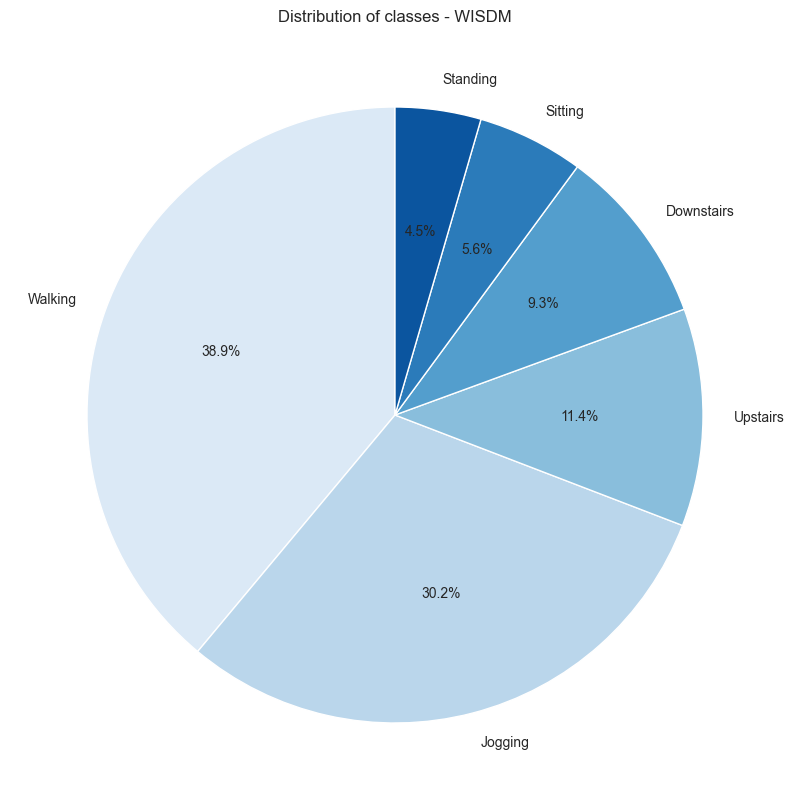

In [44]:
# Plotting the labels count as a pie chart with percentage seaborn
plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
sns.set_palette("Blues")
plt.pie(
    labels_counts.values(),
    labels=labels_counts.keys(),
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Distribution of classes - WISDM")

Text(0.5, 1.0, 'Distribution of classes - WISDM')

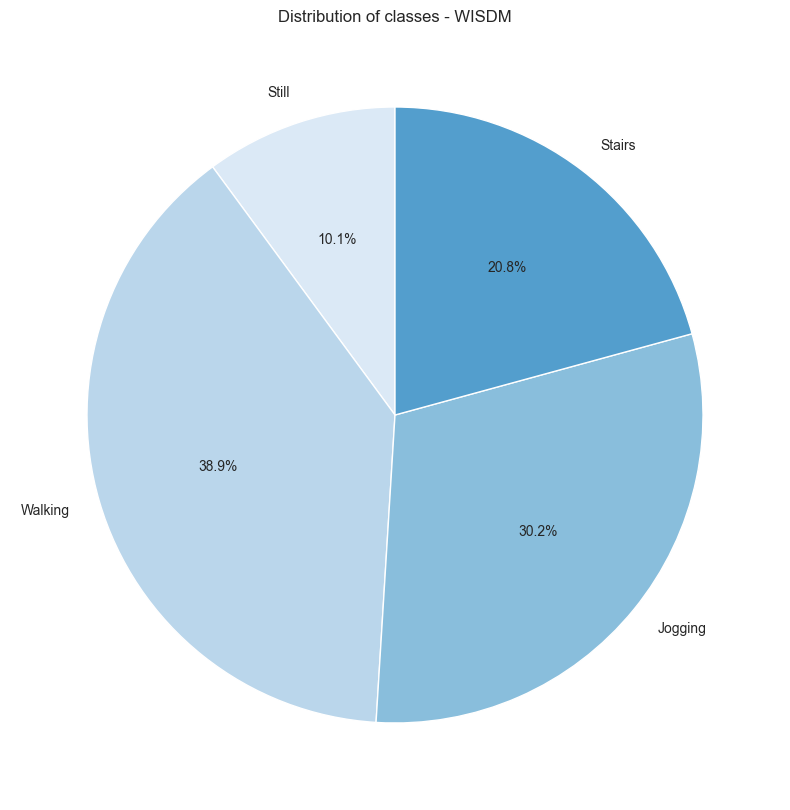

In [45]:
# Plotting the labels but sitting and standing combine them and downstairs and upstairs combine them
plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
sns.set_palette("Blues")
plt.pie(
    [
        labels_counts["Sitting"] + labels_counts["Standing"],
        labels_counts["Walking"],
        labels_counts["Jogging"],
        labels_counts["Upstairs"] + labels_counts["Downstairs"],
    ],
    labels=["Still", "Walking", "Jogging", "Stairs"],
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Distribution of classes - WISDM")

Text(0.5, 1.0, 'Distribution of classes - WISDM')

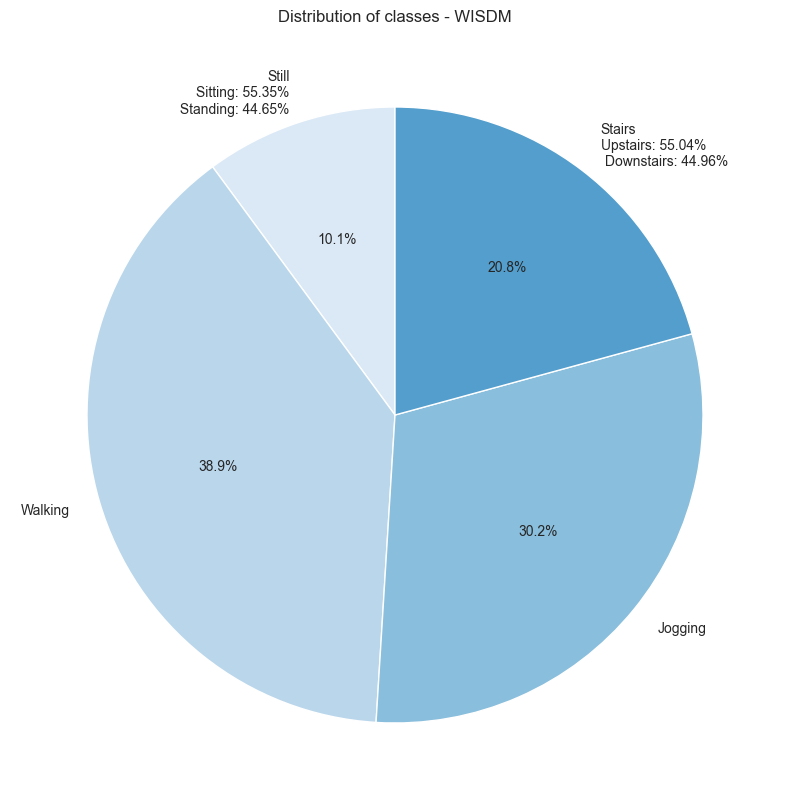

In [46]:
# Plotting the labels but sitting and standing combine them and downstairs and upstairs combine them
plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
sns.set_palette("Blues")
still_total = labels_counts["Sitting"] + labels_counts["Standing"]
sitting_percentage = round(labels_counts["Sitting"] / still_total * 100, 2)
standing_percentage = round(labels_counts["Standing"] / still_total * 100, 2)
stairs_total = labels_counts["Upstairs"] + labels_counts["Downstairs"]
upstairs_percentage = round(labels_counts["Upstairs"] / stairs_total * 100, 2)
downstairs_percentage = round(labels_counts["Downstairs"] / stairs_total * 100, 2)
still_label = (
    f"Still\nSitting: {sitting_percentage}%\n Standing: {standing_percentage}%"
)
stairs_label = (
    f"Stairs\nUpstairs: {upstairs_percentage}%\n Downstairs: {downstairs_percentage}%"
)
plt.pie(
    [still_total, labels_counts["Walking"], labels_counts["Jogging"], stairs_total],
    labels=[still_label, "Walking", "Jogging", stairs_label],
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Distribution of classes - WISDM")

## 3. Senior Citizens Dataset


In [47]:
# Read the data
senior_df = pd.read_csv(
    r"D:\Work\HAR-Comparison-Privacy\processed_data\activity_recognition_senior_citizens\all_users.csv"
)
senior_df.head()

,User_ID,Acc.X.Back_mean,Acc.X.Back_std,Acc.X.Back_min_,Acc.X.Back_max_,Acc.X.Back_range_,Acc.X.Back_iqr,Acc.X.Back_kurtosis,Acc.X.Back_skewness,Acc.X.Back_rms,...,Acc.Magnitude.Thigh_mean,Acc.Magnitude.Thigh_std,Acc.Magnitude.Thigh_min_,Acc.Magnitude.Thigh_max_,Acc.Magnitude.Thigh_range_,Acc.Magnitude.Thigh_iqr,Acc.Magnitude.Thigh_kurtosis,Acc.Magnitude.Thigh_skewness,Acc.Magnitude.Thigh_rms,Label
0,1,-0.973242,0.009110,-0.999017,-0.962481,0.036535,0.011988,0.287005,-0.998734,0.973284,...,0.974198,0.004651,0.969822,0.988048,0.018226,0.005083,0.847761,1.306047,0.974209,5.0
1,1,-0.949742,0.005949,-0.960481,-0.935223,0.025258,0.003664,0.500403,1.023481,0.949761,...,0.970946,0.001042,0.970198,0.973834,0.003637,0.000346,2.068232,1.891911,0.970947,5.0
2,1,-0.926839,0.004741,-0.934946,-0.922101,0.012845,0.008353,-1.119443,-0.803656,0.926851,...,0.962209,0.005578,0.956810,0.971691,0.014882,0.009410,-1.135823,0.796939,0.962225,5.0
3,1,-0.919239,0.002112,-0.922374,-0.915561,0.006813,0.003781,-1.212474,0.012507,0.919241,...,0.958484,0.000412,0.957983,0.959167,0.001184,0.000873,-1.485063,0.179762,0.958484,5.0
4,1,-0.920290,0.002183,-0.922761,-0.915345,0.007416,0.003209,-0.468732,0.819930,0.920293,...,0.958307,0.000316,0.957793,0.958901,0.001108,0.000316,-0.584837,0.340708,0.958307,5.0


In [48]:
# Getting the labels
labels = senior_df["Label"].unique()
print(labels)

[5. 2. 1. 6. 7. 4. 3.]


In [49]:
# Mapping the labels
mapping_labels = {
    1: "Walking",
    2: "Shuffling",
    3: "Upstairs",
    4: "Downstairs",
    5: "Standing",
    6: "Sitting",
    7: "Lying",
}
senior_df["Label"] = senior_df["Label"].map(mapping_labels)

In [50]:
# Getting the labels
labels = senior_df["Label"].unique()
print(labels)

['Standing' 'Shuffling' 'Walking' 'Sitting' 'Lying' 'Downstairs'
 'Upstairs']


In [51]:
# Getting the labels count
labels_counts_2 = {}
for label in labels:
    labels_counts_2[label] = len(senior_df[senior_df["Label"] == label])
    print(
        f"Total amount of data for {label}: {len(senior_df[senior_df['Label'] == label])}"
    )

Total amount of data for Standing: 11456
Total amount of data for Shuffling: 1674
Total amount of data for Walking: 28986
Total amount of data for Sitting: 12724
Total amount of data for Lying: 5960
Total amount of data for Downstairs: 150
Total amount of data for Upstairs: 128


Text(0.5, 1.0, 'Distribution of classes - Senior Citizens')

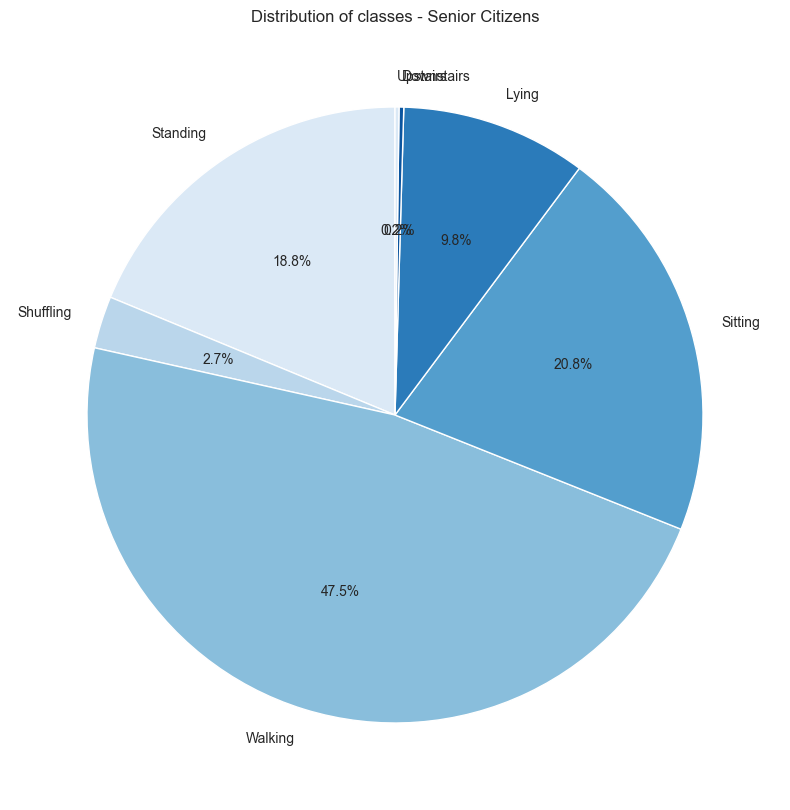

In [52]:
# Plotting the labels count as a pie chart with percentage seaborn
plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
sns.set_palette("Blues")
plt.pie(
    labels_counts_2.values(),
    labels=labels_counts_2.keys(),
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Distribution of classes - Senior Citizens")

Text(0.5, 1.0, 'Distribution of classes - Senior Citizens')

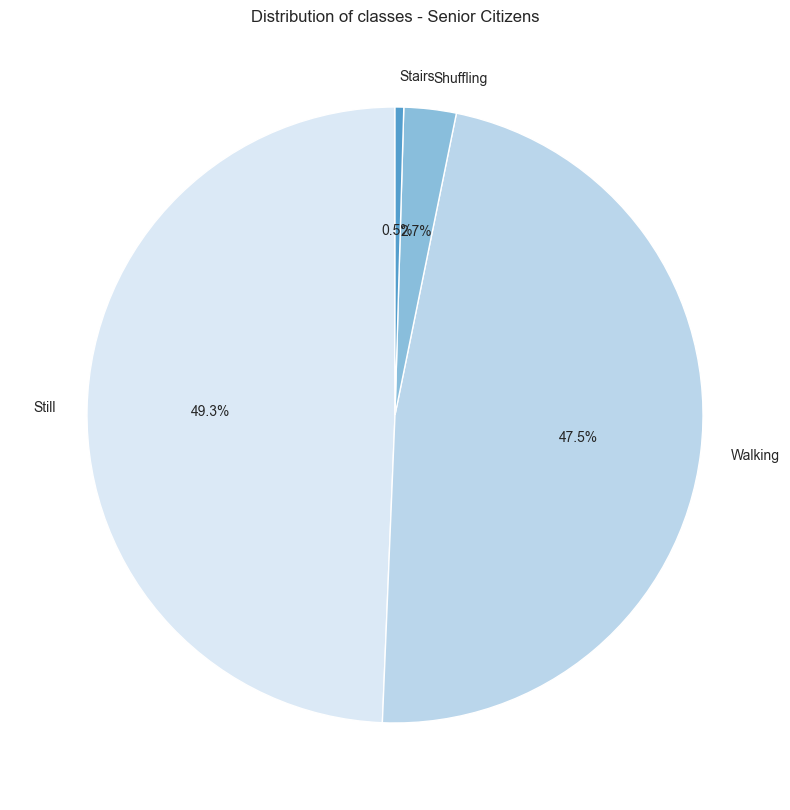

In [53]:
# Plotting the labels but sitting, standing, lying combine them and downstairs and upstairs combine them
plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
sns.set_palette("Blues")
plt.pie(
    [
        labels_counts_2["Sitting"]
        + labels_counts_2["Standing"]
        + labels_counts_2["Lying"],
        labels_counts_2["Walking"],
        labels_counts_2["Shuffling"],
        labels_counts_2["Upstairs"] + labels_counts_2["Downstairs"],
    ],
    labels=["Still", "Walking", "Shuffling", "Stairs"],
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Distribution of classes - Senior Citizens")

Text(0.5, 1.0, 'Distribution of classes - Senior Citizens')

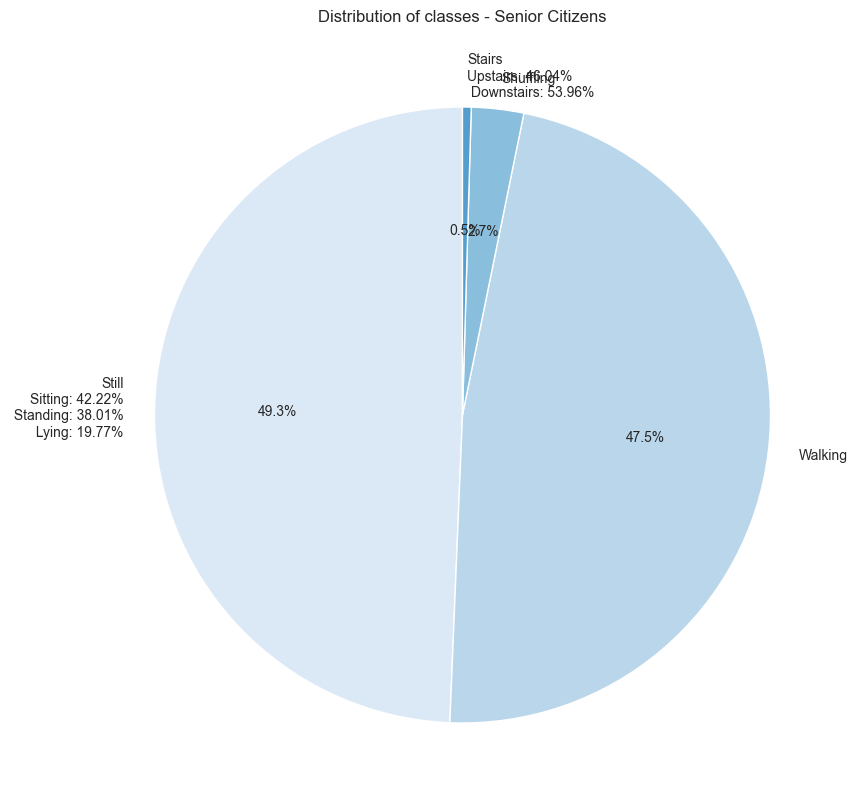

In [54]:
# Plotting the labels but sitting, standing, lying combine them and downstairs and upstairs combine them
plt.figure(figsize=(10, 10))
sns.set_style("whitegrid")
sns.set_palette("Blues")
still_total = (
    labels_counts_2["Sitting"] + labels_counts_2["Standing"] + labels_counts_2["Lying"]
)
sitting_percentage = round(labels_counts_2["Sitting"] / still_total * 100, 2)
standing_percentage = round(labels_counts_2["Standing"] / still_total * 100, 2)
lying_percentage = round(labels_counts_2["Lying"] / still_total * 100, 2)
stairs_total = labels_counts_2["Upstairs"] + labels_counts_2["Downstairs"]
upstairs_percentage = round(labels_counts_2["Upstairs"] / stairs_total * 100, 2)
downstairs_percentage = round(labels_counts_2["Downstairs"] / stairs_total * 100, 2)
still_label = f"Still\nSitting: {sitting_percentage}%\n Standing: {standing_percentage}%\n Lying: {lying_percentage}%"
stairs_label = (
    f"Stairs\nUpstairs: {upstairs_percentage}%\n Downstairs: {downstairs_percentage}%"
)
plt.pie(
    [
        still_total,
        labels_counts_2["Walking"],
        labels_counts_2["Shuffling"],
        stairs_total,
    ],
    labels=[still_label, "Walking", "Shuffling", stairs_label],
    autopct="%1.1f%%",
    startangle=90,
)
plt.title("Distribution of classes - Senior Citizens")